<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/BA_Sklearn_Clasificacion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diplomatura en **Business Analytics** - FCEJ/UdA - **Sklearn - Clasificación 01**

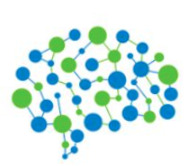

## Carga de librerías necesarias

In [1]:
import pandas as pd
from pandas import set_option
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import preprocessing

## Extracción de Datos - Creación del DataFrame

In [2]:
datos_url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datos_Banco.csv"

In [3]:
datosBanco = pd.read_csv(datos_url, sep=";")
datosBanco.head()

,edad,trabajo,civil,educacion,defecto,deposito,propiedad,prestamo,contacto,dia,mes,duracion,campaña,pdias,previo,presultado,y
0,58,gerente,casado,terciaria,no,2143,si,no,desconocido,5,may,261,1,-1,0,desconocido,no
1,44,tecnico,soltero,secundaria,no,29,si,no,desconocido,5,may,151,1,-1,0,desconocido,no
2,33,emprendedor,casado,secundaria,no,2,si,si,desconocido,5,may,76,1,-1,0,desconocido,no
3,47,collar azul,casado,desconocido,no,1506,si,no,desconocido,5,may,92,1,-1,0,desconocido,no
4,33,desconocido,soltero,desconocido,no,1,no,no,desconocido,5,may,198,1,-1,0,desconocido,no


### Tipos de datos del DataFrame y tamaño

In [4]:
datosBanco.shape

(45211, 17)

In [5]:
datosBanco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   edad        45211 non-null  int64 
 1   trabajo     45211 non-null  object
 2   civil       45211 non-null  object
 3   educacion   45211 non-null  object
 4   defecto     45211 non-null  object
 5   deposito    45211 non-null  int64 
 6   propiedad   45211 non-null  object
 7   prestamo    45211 non-null  object
 8   contacto    45211 non-null  object
 9   dia         45211 non-null  int64 
 10  mes         45211 non-null  object
 11  duracion    45211 non-null  int64 
 12  campaña     45211 non-null  int64 
 13  pdias       45211 non-null  int64 
 14  previo      45211 non-null  int64 
 15  presultado  45211 non-null  object
 16  y           45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
datosBanco.describe()

,edad,deposito,dia,duracion,campaña,pdias,previo
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Como se puede apreciar el conjunto de datos tiene 45211 filas con 17 variables. El conjunto de variables tiene variables categóricas y numéricas. El resumen de estadística descriptiva es solo para los datos numéricos.

# Prueba de Hipótesis Comerciales mediante Análisis Exploratorio de Datos

Se identifican algunos impulsores comerciales, como la edad, la situación civil , la situación laboral y los bienes registrables que posea el cliente, que se cree que influirán en la intención de generar un plazo fijo. 

## Grafico de Líneas

Se podría generar un gráfico de líneas para la prueba de hipótesis comerciales de la edad frente a la intención de generar un plazo fijo.


In [7]:
filter_mask = datosBanco['y'] == 'si'
bancoSub1 = datosBanco[filter_mask].groupby('edad')['y'].agg(grupoedad='count').reset_index()
bancoSub1.head()

,edad,grupoedad
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


Estaremos verificando cómo se distribuyen los plazos fijos por edad, contando el número de registros de la columna "y" para cada grupo de edad.


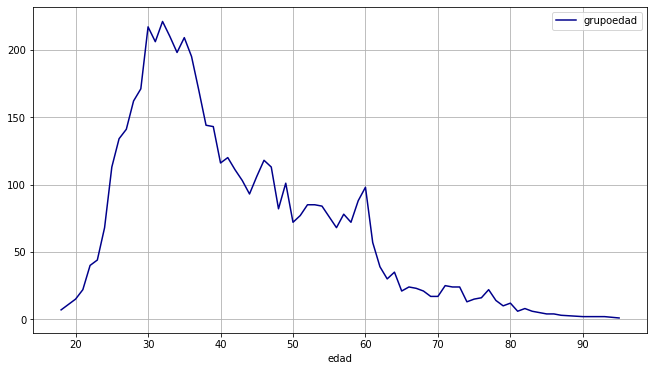

In [8]:
bancoSub1.plot("edad","grupoedad", kind='line', figsize=(11,6), color='darkblue', grid=True)

A partir de la gráfica, podemos ver que el mayor número de plazo fijo lo realizan los clientes dentro de un rango de edad entre 25 y 40, con la intención a generar el plazo fijo disminuyendo con la edad.

Esta relación es bastante contradictoria de las suposiciones en la hipótesis.

Estamos tomando los datos en función del recuento absoluto de clientes en cada rango de edad. Si la proporción de clientes bancarios es mayor dentro del rango de edad de 25 a 40, entonces es muy probable que obtengamos una grafica como la que tenemos. 

Lo que realmente deberíamos graficar es la proporción de clientes, dentro de cada grupo de edad, que generan un plazo fijo.

Teniendo en cuenta otra perspectiva

Se puede representar los datos tomando la proporción de clientes. Entonces agregaremos la intención del cliente con respecto a la edad y luego dividiremos cada categoría de intención a la generación del plazo fijo, por el número total de clientes en ese grupo de edad para obtener la intención.

In [9]:
TotalporEdad = datosBanco.groupby('edad')['y'].agg(TotalporEdad='count').reset_index()
TotalporEdad.head()

,edad,TotalporEdad
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [10]:
alt.Chart(TotalporEdad).mark_line().encode(x='edad', y='TotalporEdad')

alt.Chart(...)

Obteniendo todas las caracteristicas en un solo lugar. Ahora, se puede agrupar los datos por edad y la intención a la generación del plazo fijo y encuentre los recuentos totales bajo cada categoría de intención, que son "si" o "no".

In [11]:
PropiedadporEdad = datosBanco.groupby(['edad','y'])['y'].agg(IntencionporEdad='count').reset_index()
PropiedadporEdad.head()

,edad,y,IntencionporEdad
0,18,no,5
1,18,si,7
2,19,no,24
3,19,si,11
4,20,no,35


Fusionando los DataFrame. Se puede combinar ambos DataFrame en función de la variable "edad" con la función pd.merge() y luego se divide cada categoría de intención dentro de cada grupo de edad por el total de clientes en el grupo de edad respectivo para obtener la proporción de clientes:

In [12]:
CombinacionEdad = pd.merge(PropiedadporEdad, TotalporEdad,left_on = ['edad'], right_on = ['edad'])
CombinacionEdad["categoria"] = (CombinacionEdad.IntencionporEdad/CombinacionEdad.TotalporEdad)*100
CombinacionEdad.head()

,edad,y,IntencionporEdad,TotalporEdad,categoria
0,18,no,5,12,41.666667
1,18,si,7,12,58.333333
2,19,no,24,35,68.571429
3,19,si,11,35,31.428571
4,20,no,35,50,70.000000


Se puede mostrar la proporción de ambas categorias (si y no) en la grafica como gráficos separados. Esto se puede lograr a través de un método llamado facet() con la libreria altair.

In [13]:
alt.Chart(CombinacionEdad).mark_line().encode(x='edad', y='categoria').facet(column='y')

alt.FacetChart(...)

Esta función crea tantos gráficos como categorías haya dentro de la variable.

Los dos gráficos muestran la intención de las personas a generar un plazo fijo. Entonces el resultado final muestra dos gráficos en los que el gráfico de la izquierda muestra la proporción de personas que no generan los plazos fijos y el de la derecha muestra los clientes si generan los plazos fijos.

Se puede ver en el primer gráfico, que con el grupo de edad comenzando desde los 22 años hasta los 60 años, los individuos no estarían inclinados a generar un plazo fijo. Sin embargo, en el segundo gráfico se ve lo contrario, donde el grupo de edad a partir de los 60 años está mucho más inclinado a generar un plazo fijo.

## Conclusiones preliminares del Análisis Exploratorio de Datos

Hasta ahora se ha visto dos grandes grupos. Por lo tanto, tomar una proporción de usuarios es el enfoque correcto para obtener la perspectiva en la que debemos ver los datos. 

Esto está más en línea con la hipótesis desarrollada. Se puede visualizar hasta ahora que la intención a generar un plazo fijo es baja para los grupos de edad de 22 años hasta los 60 años, a partir de los 60 años se ve una tendencia ascendente en la demanda de plazos fijos. 

Otro dato interesante que se puede observar es la mayor proporción de generación de plazos fijos en personas menores de 20 años.

#Ingeniería de funciones impulsada por el negocio


La ingeniería de funciones impulsada por el negocio es el proceso de transformación de variables sin procesar en función de las intuiciones comerciales que se derivaron durante el Análisis Exploratorio de Datos. 

Implica transformar datos y crear nuevas variables basadas en factores comerciales o impulsores que influyen en el problema comercial.



Se explora la relación entre una cartera de activos y la intención a constitución de un plazo fijo. 

Una cartera de activos es la combinación de todos los activos y pasivos que el cliente tiene con el Banco. Se combinan los activos y pasivos, como el saldo bancario (deposito), propiedad de la vivienda (propiedad) y los préstamos para obtener una nueva característica llamada índice de activos.

In [14]:
datosBanco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   edad        45211 non-null  int64 
 1   trabajo     45211 non-null  object
 2   civil       45211 non-null  object
 3   educacion   45211 non-null  object
 4   defecto     45211 non-null  object
 5   deposito    45211 non-null  int64 
 6   propiedad   45211 non-null  object
 7   prestamo    45211 non-null  object
 8   contacto    45211 non-null  object
 9   dia         45211 non-null  int64 
 10  mes         45211 non-null  object
 11  duracion    45211 non-null  int64 
 12  campaña     45211 non-null  int64 
 13  pdias       45211 non-null  int64 
 14  previo      45211 non-null  int64 
 15  presultado  45211 non-null  object
 16  y           45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Relacion entre ser Propietario de un Inmueble y la intención de generar un Plazo Fijo

In [15]:
datosBanco.groupby(['propiedad', 'y'])['y'].agg(Total='count').reset_index()

,propiedad,y,Total
0,no,no,16727
1,no,si,3354
2,si,no,23195
3,si,si,1935


A partir de los valores, podemos ver que la propensión a generar plazos fijos es mucho mayor para las personas que no son propietarios de una casa en comparación con aquellos que tienen casa propia.

## Relacion entre poseer un Préstamo Bancario y la intención de generar un Plazo Fijo

In [16]:
datosBanco.groupby(['prestamo', 'y'])['y'].agg(Total='count').reset_index()

,prestamo,y,Total
0,no,no,33162
1,no,si,4805
2,si,no,6760
3,si,si,484


En el caso de las carteras de crédito, la propensión a los plazo fijo es mayor para los clientes sin préstamos con el Banco.

La propiedad y los préstamos eran datos categóricos (si o no) y encontrar una relación con esos datos es sencillo. 

Sin embargo, los datos del saldo de los depositos bancarios son numéricos y para analizarlos se necesita tener una estrategia. Una estrategia común es convertir los datos numéricos continuos en datos ordinales y observar cómo varía la propensión en cada categoría que se genere.

Para convertir valores numéricos en valores ordinales, primero buscamos los valores de los cuantiles y los tomamos como umbrales. Los cuantiles se obtienen utilizando el código:

## Tomando los cuantiles del 25%, 50% y 75% de los Depositos

In [17]:
Deposito025 = datosBanco["deposito"].quantile(q=0.25)
Deposito025

72.0

In [18]:
Deposito050 = datosBanco["deposito"].quantile(q=0.50)
Deposito050

448.0

In [19]:
Deposito075 = datosBanco["deposito"].quantile(q=0.75)
Deposito075

1428.0

## Creación de características para datos bancarios basados ​​en los cuantiles

Los valores de cuantiles representan ciertos valores de umbral para la distribución de datos.

In [20]:
datosBanco["cuantiles"] = "Cuantil_1"
datosBanco.loc[(datosBanco["deposito"] > Deposito025) & (datosBanco["deposito"] < Deposito050), "cuantiles"] = "Cuantil_2"
datosBanco.loc[(datosBanco["deposito"] > Deposito050) & (datosBanco["deposito"] < Deposito075), "cuantiles"] = "Cuantil_3"
datosBanco.loc[datosBanco["deposito"] > Deposito075, "cuantiles"] = "Cuantil_4"
datosBanco.head()

,edad,trabajo,civil,educacion,defecto,deposito,propiedad,prestamo,contacto,dia,mes,duracion,campaña,pdias,previo,presultado,y,cuantiles
0,58,gerente,casado,terciaria,no,2143,si,no,desconocido,5,may,261,1,-1,0,desconocido,no,Cuantil_4
1,44,tecnico,soltero,secundaria,no,29,si,no,desconocido,5,may,151,1,-1,0,desconocido,no,Cuantil_1
2,33,emprendedor,casado,secundaria,no,2,si,si,desconocido,5,may,76,1,-1,0,desconocido,no,Cuantil_1
3,47,collar azul,casado,desconocido,no,1506,si,no,desconocido,5,may,92,1,-1,0,desconocido,no,Cuantil_4
4,33,desconocido,soltero,desconocido,no,1,no,no,desconocido,5,may,198,1,-1,0,desconocido,no,Cuantil_1


Todos los valores más bajos que el cuantil 25% valor 72, se clasificaron como "Cuantil_1", los valores entre 72 y 448 se clasificaron como "Cuantil_2", y así sucesivamente. 

Para almacenar las categorías de cuantiles, se crea una nueva característica en el conjunto de datos bancarios llamada "cuantiles" y se establece su valor predeterminado en el "Cuantil_1". Después de esto, en función de cada umbral de valores de los cuantiles, los datos se clasifican de acuerdo al cuantil respectivo.

Ahora se necesita encontrar la propensión de plazos fijos en función de cada cuantil en el que están clasificados los clientes.

## Total de los Clientes Bancarios por Cuantil - CBC

In [21]:
CBC = datosBanco.groupby(["cuantiles"])["y"].agg(TCBC='count').reset_index()
CBC

,cuantiles,TCBC
0,Cuantil_1,11340
1,Cuantil_2,11275
2,Cuantil_3,11299
3,Cuantil_4,11297


## Total de los Clientes Bancarios por Cuantil Desagregados - CBCD

In [22]:
CBCD = datosBanco.groupby(["cuantiles", "y"])["y"].agg(TCBCD='count').reset_index()
CBCD

,cuantiles,y,TCBCD
0,Cuantil_1,no,10517
1,Cuantil_1,si,823
2,Cuantil_2,no,10049
3,Cuantil_2,si,1226
4,Cuantil_3,no,9884
5,Cuantil_3,si,1415
6,Cuantil_4,no,9472
7,Cuantil_4,si,1825


## Fusionando los DataFrame

In [23]:
Clientes = pd.merge(CBCD, CBC, on = ["cuantiles"])
Clientes

,cuantiles,y,TCBCD,TCBC
0,Cuantil_1,no,10517,11340
1,Cuantil_1,si,823,11340
2,Cuantil_2,no,10049,11275
3,Cuantil_2,si,1226,11275
4,Cuantil_3,no,9884,11299
5,Cuantil_3,si,1415,11299
6,Cuantil_4,no,9472,11297
7,Cuantil_4,si,1825,11297


In [24]:
Clientes["proporcion"] = (Clientes.TCBCD/Clientes.TCBC)*100
Clientes

,cuantiles,y,TCBCD,TCBC,proporcion
0,Cuantil_1,no,10517,11340,92.742504
1,Cuantil_1,si,823,11340,7.257496
2,Cuantil_2,no,10049,11275,89.126386
3,Cuantil_2,si,1226,11275,10.873614
4,Cuantil_3,no,9884,11299,87.476768
5,Cuantil_3,si,1415,11299,12.523232
6,Cuantil_4,no,9472,11297,83.845269
7,Cuantil_4,si,1825,11297,16.154731


A partir de la distribución de los datos bancarios, se puede ver que a medida que se pasa del Cuantil 1 al Cuantil 4, la proporción de clientes que generan plazo fijo aumenta.

De esta tendencia se puede concluir que los clientes con mayores depositos bancarios tienen más propensión de generar plazos fijos. Por lo tanto las personas con más dinero depositado y sin préstamos tienen una mayor propensión a los plazos fijos.

# Generación del Modelo - Indice de Activos

Una metodología para crear un Índice de Activos consiste en asignar ponderaciones en función del activo o pasivo del cliente del Banco.

Por ejemplo, un deposito bancario más alto o la propiedad de una vivienda tendrá una influencia positiva en el índice de activos y, por lo tanto, se le asignará un peso más alto. 

En cambio, la presencia de un préstamo será un pasivo y, por tanto, tendrá que tener un peso menor. 

Se le otorga un peso de 5 si el cliente tiene una casa y 1 en su ausencia. Del mismo modo, podemos dar una ponderación de 1 si el cliente tiene un préstamo y de 5 en caso de que no haya préstamos.

## Normalización de variables numéricas

In [25]:
x = datosBanco[["deposito"]].values.astype(float)

Como el conjunto de datos del saldo bancario contiene valores numéricos, primero debemos normalizar los datos. El propósito de la normalización es traer todas las variables que estamos usando para crear la nueva característica en una escala común. Se llama un método efectivo que podemos usar aquí para la función de normalización.

El método es MinMaxScaler() que convierte todos los datos numéricos entre un rango escalado de 0 a 1.

In [26]:
transformacion = preprocessing.MinMaxScaler()

Transformamos los datos de los depositos normalizándolos con transformacion


In [27]:
datosBanco["depositostransf"] = transformacion.fit_transform(x)

In [28]:
datosBanco.head()

,edad,trabajo,civil,educacion,defecto,deposito,propiedad,prestamo,contacto,dia,mes,duracion,campaña,pdias,previo,presultado,y,cuantiles,depositostransf
0,58,gerente,casado,terciaria,no,2143,si,no,desconocido,5,may,261,1,-1,0,desconocido,no,Cuantil_4,0.092259
1,44,tecnico,soltero,secundaria,no,29,si,no,desconocido,5,may,151,1,-1,0,desconocido,no,Cuantil_1,0.073067
2,33,emprendedor,casado,secundaria,no,2,si,si,desconocido,5,may,76,1,-1,0,desconocido,no,Cuantil_1,0.072822
3,47,collar azul,casado,desconocido,no,1506,si,no,desconocido,5,may,92,1,-1,0,desconocido,no,Cuantil_4,0.086476
4,33,desconocido,soltero,desconocido,no,1,no,no,desconocido,5,may,198,1,-1,0,desconocido,no,Cuantil_1,0.072812


Después de crear la variable normalizada, agregue un valor pequeño de 0.001 para eliminar los valores 0 en la variable normalizada.

In [29]:
datosBanco.depositostransf

0        0.092259
1        0.073067
2        0.072822
3        0.086476
4        0.072812
           ...   
45206    0.080293
45207    0.088501
45208    0.124689
45209    0.078868
45210    0.099777
Name: depositostransf, Length: 45211, dtype: float64

In [30]:
datosBanco.depositostransf = datosBanco.depositostransf + 0.001

In [31]:
datosBanco.depositostransf

0        0.093259
1        0.074067
2        0.073822
3        0.087476
4        0.073812
           ...   
45206    0.081293
45207    0.089501
45208    0.125689
45209    0.079868
45210    0.100777
Name: depositostransf, Length: 45211, dtype: float64

El propósito de sumar este pequeño valor es porque, en los pasos siguientes, multiplicaremos tres variables transformadas para formar un índice compuesto. El valor pequeño se agrega para evitar que los valores de la variable se conviertan en 0 durante la operación de multiplicación.


Ahora, se agregan dos columnas adicionales para introducir las variables transformadas de préstamos y vivienda, según el enfoque de ponderación discutido:

## Otras variables transformadas

In [32]:
datosBanco.loc[datosBanco["prestamo"] =="si", "prestamotransf"] = 1
datosBanco.loc[datosBanco["prestamo"] =="no", "prestamotransf"] = 5
datosBanco.head()

,edad,trabajo,civil,educacion,defecto,deposito,propiedad,prestamo,contacto,dia,mes,duracion,campaña,pdias,previo,presultado,y,cuantiles,depositostransf,prestamotransf
0,58,gerente,casado,terciaria,no,2143,si,no,desconocido,5,may,261,1,-1,0,desconocido,no,Cuantil_4,0.093259,5.0
1,44,tecnico,soltero,secundaria,no,29,si,no,desconocido,5,may,151,1,-1,0,desconocido,no,Cuantil_1,0.074067,5.0
2,33,emprendedor,casado,secundaria,no,2,si,si,desconocido,5,may,76,1,-1,0,desconocido,no,Cuantil_1,0.073822,1.0
3,47,collar azul,casado,desconocido,no,1506,si,no,desconocido,5,may,92,1,-1,0,desconocido,no,Cuantil_4,0.087476,5.0
4,33,desconocido,soltero,desconocido,no,1,no,no,desconocido,5,may,198,1,-1,0,desconocido,no,Cuantil_1,0.073812,5.0


In [33]:
datosBanco.loc[datosBanco["propiedad"] =="si", "propiedadtransf"] = 5
datosBanco.loc[datosBanco["propiedad"] =="no", "propiedadtransf"] = 1
datosBanco.head()

,edad,trabajo,civil,educacion,defecto,deposito,propiedad,prestamo,contacto,dia,mes,duracion,campaña,pdias,previo,presultado,y,cuantiles,depositostransf,prestamotransf,propiedadtransf
0,58,gerente,casado,terciaria,no,2143,si,no,desconocido,5,may,261,1,-1,0,desconocido,no,Cuantil_4,0.093259,5.0,5.0
1,44,tecnico,soltero,secundaria,no,29,si,no,desconocido,5,may,151,1,-1,0,desconocido,no,Cuantil_1,0.074067,5.0,5.0
2,33,emprendedor,casado,secundaria,no,2,si,si,desconocido,5,may,76,1,-1,0,desconocido,no,Cuantil_1,0.073822,1.0,5.0
3,47,collar azul,casado,desconocido,no,1506,si,no,desconocido,5,may,92,1,-1,0,desconocido,no,Cuantil_4,0.087476,5.0,5.0
4,33,desconocido,soltero,desconocido,no,1,no,no,desconocido,5,may,198,1,-1,0,desconocido,no,Cuantil_1,0.073812,5.0,1.0


Una vez que se crean todas las variables transformadas, podemos multiplicar todas las variables transformadas juntas para crear un nuevo índice llamado Indice de Activos. Este es un índice compuesto que representa el efecto combinado de las tres variables.

## Indice de Activos

In [34]:
datosBanco["IndiceActivos"] = datosBanco.depositostransf * datosBanco.prestamotransf * datosBanco.propiedadtransf

In [35]:
datosBanco.head()

,edad,trabajo,civil,educacion,defecto,deposito,propiedad,prestamo,contacto,dia,mes,duracion,campaña,pdias,previo,presultado,y,cuantiles,depositostransf,prestamotransf,propiedadtransf,IndiceActivos
0,58,gerente,casado,terciaria,no,2143,si,no,desconocido,5,may,261,1,-1,0,desconocido,no,Cuantil_4,0.093259,5.0,5.0,2.331484
1,44,tecnico,soltero,secundaria,no,29,si,no,desconocido,5,may,151,1,-1,0,desconocido,no,Cuantil_1,0.074067,5.0,5.0,1.851666
2,33,emprendedor,casado,secundaria,no,2,si,si,desconocido,5,may,76,1,-1,0,desconocido,no,Cuantil_1,0.073822,1.0,5.0,0.369108
3,47,collar azul,casado,desconocido,no,1506,si,no,desconocido,5,may,92,1,-1,0,desconocido,no,Cuantil_4,0.087476,5.0,5.0,2.186903
4,33,desconocido,soltero,desconocido,no,1,no,no,desconocido,5,may,198,1,-1,0,desconocido,no,Cuantil_1,0.073812,5.0,1.0,0.369062


Observamos la relación entre el índice de activos y la propensión al plazo fijo. Adoptamos una estrategia similar de convertir los valores numéricos del índice de activos en valores ordinales tomando los cuantiles y luego mapeando los cuantiles a la propensión al plazo fijo.

In [36]:
Indice025 = datosBanco["IndiceActivos"].quantile(q=0.25)
Indice025

0.38163646432916315

In [37]:
Indice050 = datosBanco["IndiceActivos"].quantile(q=0.50)
Indice050

0.5741536687669093

In [38]:
Indice075 = datosBanco["IndiceActivos"].quantile(q=0.75)
Indice075

1.9274748969549507

### Creación de Cuantiles basados ​​en Indice de Activos

In [39]:
datosBanco["cuantilesIndice"] = "Cuantil_1"
datosBanco.loc[(datosBanco["IndiceActivos"] > Indice025) & (datosBanco["IndiceActivos"] < Indice050), "cuantilesIndice"] = "Cuantil_2"
datosBanco.loc[(datosBanco["IndiceActivos"] > Indice050) & (datosBanco["IndiceActivos"] < Indice075), "cuantilesIndice"] = "Cuantil_3"
datosBanco.loc[datosBanco["IndiceActivos"] > Indice075, "cuantilesIndice"] = "Cuantil_4"
datosBanco.head()

,edad,trabajo,civil,educacion,defecto,deposito,propiedad,prestamo,contacto,dia,mes,duracion,campaña,pdias,previo,presultado,y,cuantiles,depositostransf,prestamotransf,propiedadtransf,IndiceActivos,cuantilesIndice
0,58,gerente,casado,terciaria,no,2143,si,no,desconocido,5,may,261,1,-1,0,desconocido,no,Cuantil_4,0.093259,5.0,5.0,2.331484,Cuantil_4
1,44,tecnico,soltero,secundaria,no,29,si,no,desconocido,5,may,151,1,-1,0,desconocido,no,Cuantil_1,0.074067,5.0,5.0,1.851666,Cuantil_3
2,33,emprendedor,casado,secundaria,no,2,si,si,desconocido,5,may,76,1,-1,0,desconocido,no,Cuantil_1,0.073822,1.0,5.0,0.369108,Cuantil_1
3,47,collar azul,casado,desconocido,no,1506,si,no,desconocido,5,may,92,1,-1,0,desconocido,no,Cuantil_4,0.087476,5.0,5.0,2.186903,Cuantil_4
4,33,desconocido,soltero,desconocido,no,1,no,no,desconocido,5,may,198,1,-1,0,desconocido,no,Cuantil_1,0.073812,5.0,1.0,0.369062,Cuantil_1


### Total de los Clientes Bancarios por Cuantil Indice - CBCI

In [40]:
CBCI = datosBanco.groupby(["cuantilesIndice"])["y"].agg(TCBCI='count').reset_index()
CBCI

,cuantilesIndice,TCBCI
0,Cuantil_1,11329
1,Cuantil_2,11295
2,Cuantil_3,11298
3,Cuantil_4,11289


### Total de los Clientes Bancarios por Cuantil Indice Desagregado - CBCD

In [41]:
CBCID = datosBanco.groupby(["cuantilesIndice", "y"])["y"].agg(TCBCID='count').reset_index()
CBCID

,cuantilesIndice,y,TCBCID
0,Cuantil_1,no,10186
1,Cuantil_1,si,1143
2,Cuantil_2,no,9181
3,Cuantil_2,si,2114
4,Cuantil_3,no,10314
5,Cuantil_3,si,984
6,Cuantil_4,no,10241
7,Cuantil_4,si,1048


### Fusionando los DataFrame

In [42]:
ClientesIndice = pd.merge(CBCID, CBCI, on = ["cuantilesIndice"])
ClientesIndice

,cuantilesIndice,y,TCBCID,TCBCI
0,Cuantil_1,no,10186,11329
1,Cuantil_1,si,1143,11329
2,Cuantil_2,no,9181,11295
3,Cuantil_2,si,2114,11295
4,Cuantil_3,no,10314,11298
5,Cuantil_3,si,984,11298
6,Cuantil_4,no,10241,11289
7,Cuantil_4,si,1048,11289


In [43]:
ClientesIndice["Indice"] = (ClientesIndice.TCBCID/ClientesIndice.TCBCI)*100
ClientesIndice

,cuantilesIndice,y,TCBCID,TCBCI,Indice
0,Cuantil_1,no,10186,11329,89.910848
1,Cuantil_1,si,1143,11329,10.089152
2,Cuantil_2,no,9181,11295,81.283754
3,Cuantil_2,si,2114,11295,18.716246
4,Cuantil_3,no,10314,11298,91.290494
5,Cuantil_3,si,984,11298,8.709506
6,Cuantil_4,no,10241,11289,90.716627
7,Cuantil_4,si,1048,11289,9.283373


De la nueva función que creamos, podemos ver que el 18.716% (obtenemos este porcentaje de Indice) de los clientes que están en Cuantil_2 han generado plazos fijos en comparación con el resto. 

Dado que el Cuantil_2 tiene la mayor proporción de clientes que han generado plazo fijo, se puede concluir que esos clientes tienen una mayor propensión al plazo fijo que el resto de los clientes.



# Matriz de Correlación

La correlación es una medida que indica cómo dos variables fluctúan juntas. Cualquier valor de correlación de 1, o cercano a 1, indica que esas variables están altamente correlacionadas. Las variables altamente correlacionadas a veces pueden dañar la veracidad de los modelos y, en muchas circunstancias, tomamos la decisión de eliminar tales variables o combinarlas para formar variables compuestas o interactivas.

In [44]:
numerosBanco = datosBanco[["edad","deposito","dia","duracion","campaña","pdias","previo"]]

## Generación de Matriz de Correlación

In [45]:
set_option("precision",3)
correlacionBanco = numerosBanco.corr(method = "pearson")
correlacionBanco

,edad,deposito,dia,duracion,campaña,pdias,previo
edad,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
deposito,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
dia,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duracion,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaña,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
pdias,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
previo,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


## Visualizando la Matriz de Correlación

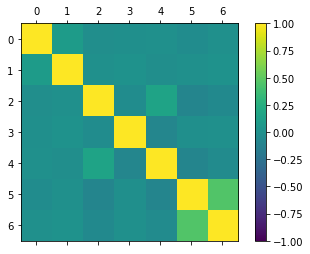

In [46]:
GraficoCorrelacion = pyplot.figure()
Ejes = GraficoCorrelacion.add_subplot(111)
EjesCorrelacion = Ejes.matshow(correlacionBanco,vmin=-1,vmax=1)
GraficoCorrelacion.colorbar(EjesCorrelacion)
pyplot.show()